<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/Workout_JumpingJacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [ ]:
# Upload first your data before execute these code below
path_workout = "/content/jumping.csv"; # change this
path_other = "/content/other.csv"; # change this
name_class = "Jumping_Jacks" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [ ]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [ ]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,416.85153,191.27673,421.06717,186.23184,412.55588,185.04674,421.79523,188.88370,403.08660,188.05612,...,404.85388,280.02000,378.79390,338.88724,441.89850,337.70532,357.11765,387.11896,460.77790,390.96878
1,416.63058,165.34013,420.75458,161.16010,410.57635,160.85341,423.51230,168.30700,402.72125,170.22153,...,395.98630,290.24072,443.08624,366.49670,380.75900,369.28723,458.97630,436.71954,355.84988,433.07160
2,413.90660,177.68918,419.13080,174.46242,410.49310,172.51065,425.94345,180.83026,404.26318,178.13527,...,403.64334,269.23764,378.61188,340.90775,438.78467,341.87695,354.68564,402.62195,459.25280,401.83865
3,415.44050,163.37437,419.53812,159.98976,409.76895,158.88847,422.70862,166.25517,401.73096,165.12907,...,396.17123,276.59560,441.42230,355.72433,379.16443,355.49490,458.57556,426.35760,354.34628,422.83643
4,415.24402,167.21124,419.62592,164.16922,410.15872,162.97308,424.91490,170.46786,402.25217,168.48668,...,397.49475,268.50520,440.37457,340.16183,378.13123,338.23557,458.71014,403.65466,352.70370,402.86285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,288.10562,153.17415,293.74990,149.16974,284.83740,148.14067,300.05320,155.35457,279.11984,155.06812,...,274.86750,272.93915,320.59576,341.38550,255.77795,340.29037,340.92526,406.35846,231.46616,407.63675
440,284.41046,159.81787,289.69034,155.80798,281.19940,154.77216,296.10977,161.08730,275.76474,160.31775,...,271.90560,275.12500,316.18915,338.63147,253.49258,339.14368,338.41006,406.58320,228.61899,408.89084
441,281.96160,162.47073,287.31638,159.13873,278.84506,158.29572,292.78320,163.49287,274.08290,163.16525,...,268.74610,278.34550,312.71658,344.13596,251.23270,344.99857,334.01425,411.49680,226.94298,410.08746
442,280.81003,171.67633,286.29270,167.43250,276.80872,166.62091,289.70584,170.87642,271.40637,169.60754,...,264.68182,280.63870,309.39670,349.14117,247.15760,348.21796,328.78270,411.83124,221.58105,410.16492


In [ ]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.000522,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.000500,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.000487,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.000491,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.000487,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [ ]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,416.85153,191.27673,421.06717,186.23184,412.55588,185.04674,421.79523,188.88370,403.08660,188.05612,...,280.02000,378.79390,338.88724,441.89850,337.70532,357.11765,387.11896,460.77790,390.96878,Jumping_Jacks
1,416.63058,165.34013,420.75458,161.16010,410.57635,160.85341,423.51230,168.30700,402.72125,170.22153,...,290.24072,443.08624,366.49670,380.75900,369.28723,458.97630,436.71954,355.84988,433.07160,Jumping_Jacks
2,413.90660,177.68918,419.13080,174.46242,410.49310,172.51065,425.94345,180.83026,404.26318,178.13527,...,269.23764,378.61188,340.90775,438.78467,341.87695,354.68564,402.62195,459.25280,401.83865,Jumping_Jacks
3,415.44050,163.37437,419.53812,159.98976,409.76895,158.88847,422.70862,166.25517,401.73096,165.12907,...,276.59560,441.42230,355.72433,379.16443,355.49490,458.57556,426.35760,354.34628,422.83643,Jumping_Jacks
4,415.24402,167.21124,419.62592,164.16922,410.15872,162.97308,424.91490,170.46786,402.25217,168.48668,...,268.50520,440.37457,340.16183,378.13123,338.23557,458.71014,403.65466,352.70370,402.86285,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,288.10562,153.17415,293.74990,149.16974,284.83740,148.14067,300.05320,155.35457,279.11984,155.06812,...,272.93915,320.59576,341.38550,255.77795,340.29037,340.92526,406.35846,231.46616,407.63675,Jumping_Jacks
440,284.41046,159.81787,289.69034,155.80798,281.19940,154.77216,296.10977,161.08730,275.76474,160.31775,...,275.12500,316.18915,338.63147,253.49258,339.14368,338.41006,406.58320,228.61899,408.89084,Jumping_Jacks
441,281.96160,162.47073,287.31638,159.13873,278.84506,158.29572,292.78320,163.49287,274.08290,163.16525,...,278.34550,312.71658,344.13596,251.23270,344.99857,334.01425,411.49680,226.94298,410.08746,Jumping_Jacks
442,280.81003,171.67633,286.29270,167.43250,276.80872,166.62091,289.70584,170.87642,271.40637,169.60754,...,280.63870,309.39670,349.14117,247.15760,348.21796,328.78270,411.83124,221.58105,410.16492,Jumping_Jacks


In [ ]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,416.85153,191.27673,421.06717,186.23184,412.55588,185.04674,421.79523,188.88370,403.08660,188.05612,...,280.02000,378.79390,338.88724,441.89850,337.70532,357.11765,387.11896,460.77790,390.96878,Jumping_Jacks
1,416.63058,165.34013,420.75458,161.16010,410.57635,160.85341,423.51230,168.30700,402.72125,170.22153,...,290.24072,443.08624,366.49670,380.75900,369.28723,458.97630,436.71954,355.84988,433.07160,Jumping_Jacks
2,413.90660,177.68918,419.13080,174.46242,410.49310,172.51065,425.94345,180.83026,404.26318,178.13527,...,269.23764,378.61188,340.90775,438.78467,341.87695,354.68564,402.62195,459.25280,401.83865,Jumping_Jacks
3,415.44050,163.37437,419.53812,159.98976,409.76895,158.88847,422.70862,166.25517,401.73096,165.12907,...,276.59560,441.42230,355.72433,379.16443,355.49490,458.57556,426.35760,354.34628,422.83643,Jumping_Jacks
4,415.24402,167.21124,419.62592,164.16922,410.15872,162.97308,424.91490,170.46786,402.25217,168.48668,...,268.50520,440.37457,340.16183,378.13123,338.23557,458.71014,403.65466,352.70370,402.86285,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,288.10562,153.17415,293.74990,149.16974,284.83740,148.14067,300.05320,155.35457,279.11984,155.06812,...,272.93915,320.59576,341.38550,255.77795,340.29037,340.92526,406.35846,231.46616,407.63675,Jumping_Jacks
440,284.41046,159.81787,289.69034,155.80798,281.19940,154.77216,296.10977,161.08730,275.76474,160.31775,...,275.12500,316.18915,338.63147,253.49258,339.14368,338.41006,406.58320,228.61899,408.89084,Jumping_Jacks
441,281.96160,162.47073,287.31638,159.13873,278.84506,158.29572,292.78320,163.49287,274.08290,163.16525,...,278.34550,312.71658,344.13596,251.23270,344.99857,334.01425,411.49680,226.94298,410.08746,Jumping_Jacks
442,280.81003,171.67633,286.29270,167.43250,276.80872,166.62091,289.70584,170.87642,271.40637,169.60754,...,280.63870,309.39670,349.14117,247.15760,348.21796,328.78270,411.83124,221.58105,410.16492,Jumping_Jacks


In [ ]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193,other
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153,other
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280,other
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178,other
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [ ]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,416.851530,191.276730,421.067170,186.231840,412.555880,185.046740,421.795230,188.883700,403.086600,188.056120,...,280.020000,378.793900,338.887240,441.898500,337.705320,357.117650,387.118960,460.777900,390.968780,Jumping_Jacks
1,416.630580,165.340130,420.754580,161.160100,410.576350,160.853410,423.512300,168.307000,402.721250,170.221530,...,290.240720,443.086240,366.496700,380.759000,369.287230,458.976300,436.719540,355.849880,433.071600,Jumping_Jacks
2,413.906600,177.689180,419.130800,174.462420,410.493100,172.510650,425.943450,180.830260,404.263180,178.135270,...,269.237640,378.611880,340.907750,438.784670,341.876950,354.685640,402.621950,459.252800,401.838650,Jumping_Jacks
3,415.440500,163.374370,419.538120,159.989760,409.768950,158.888470,422.708620,166.255170,401.730960,165.129070,...,276.595600,441.422300,355.724330,379.164430,355.494900,458.575560,426.357600,354.346280,422.836430,Jumping_Jacks
4,415.244020,167.211240,419.625920,164.169220,410.158720,162.973080,424.914900,170.467860,402.252170,168.486680,...,268.505200,440.374570,340.161830,378.131230,338.235570,458.710140,403.654660,352.703700,402.862850,Jumping_Jacks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
978,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
979,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
980,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [ ]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,416.851530,191.276730,421.067170,186.231840,412.555880,185.046740,421.795230,188.883700,403.086600,188.056120,...,404.853880,280.020000,378.793900,338.887240,441.898500,337.705320,357.117650,387.118960,460.777900,390.968780
1,416.630580,165.340130,420.754580,161.160100,410.576350,160.853410,423.512300,168.307000,402.721250,170.221530,...,395.986300,290.240720,443.086240,366.496700,380.759000,369.287230,458.976300,436.719540,355.849880,433.071600
2,413.906600,177.689180,419.130800,174.462420,410.493100,172.510650,425.943450,180.830260,404.263180,178.135270,...,403.643340,269.237640,378.611880,340.907750,438.784670,341.876950,354.685640,402.621950,459.252800,401.838650
3,415.440500,163.374370,419.538120,159.989760,409.768950,158.888470,422.708620,166.255170,401.730960,165.129070,...,396.171230,276.595600,441.422300,355.724330,379.164430,355.494900,458.575560,426.357600,354.346280,422.836430
4,415.244020,167.211240,419.625920,164.169220,410.158720,162.973080,424.914900,170.467860,402.252170,168.486680,...,397.494750,268.505200,440.374570,340.161830,378.131230,338.235570,458.710140,403.654660,352.703700,402.862850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
978,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
979,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
980,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


In [ ]:
y

,class
0,Jumping_Jacks
1,Jumping_Jacks
2,Jumping_Jacks
3,Jumping_Jacks
4,Jumping_Jacks
...,...
977,other
978,other
979,other
980,other


In [ ]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [ ]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [ ]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,6.513305e-01,0.531324,6.579175e-01,0.517311,6.446186e-01,0.514019,6.590550e-01,0.524677,6.298228e-01,0.522378,...,6.325842e-01,0.777833,5.918655e-01,0.941353,6.904664e-01,0.938070,5.579963e-01,1.075330,7.199655e-01,1.086024
1,6.509853e-01,0.459278,6.574290e-01,0.447667,6.415255e-01,0.446815,6.617380e-01,0.467519,6.292520e-01,0.472838,...,6.187286e-01,0.806224,6.923222e-01,1.018046,5.949359e-01,1.025798,7.171505e-01,1.213110,5.560154e-01,1.202977
2,6.467291e-01,0.493581,6.548919e-01,0.484618,6.413955e-01,0.479196,6.655366e-01,0.502306,6.316612e-01,0.494820,...,6.306927e-01,0.747882,5.915811e-01,0.946966,6.856010e-01,0.949658,5.541963e-01,1.118394,7.175825e-01,1.116218
3,6.491258e-01,0.453818,6.555283e-01,0.444416,6.402640e-01,0.441357,6.604822e-01,0.461820,6.277046e-01,0.458692,...,6.190175e-01,0.768321,6.897223e-01,0.988123,5.924444e-01,0.987486,7.165243e-01,1.184327,5.536661e-01,1.174546
4,6.488188e-01,0.464476,6.556655e-01,0.456026,6.408730e-01,0.452703,6.639295e-01,0.473522,6.285190e-01,0.468019,...,6.210855e-01,0.745848,6.880853e-01,0.944894,5.908300e-01,0.939543,7.167346e-01,1.121263,5.510995e-01,1.119063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,6.970672e-07,0.000003,6.904234e-07,0.000002,6.657641e-07,0.000002,5.651531e-07,0.000002,5.328313e-07,0.000002,...,2.067922e-07,0.000006,4.861906e-07,0.000004,8.541672e-07,0.000005,4.184141e-07,0.000006,5.739297e-07,0.000006
978,6.305172e-07,0.000003,6.212203e-07,0.000002,5.950141e-07,0.000002,4.815219e-07,0.000002,4.465984e-07,0.000002,...,2.124313e-07,0.000006,3.767109e-07,0.000005,5.032234e-07,0.000006,4.813906e-07,0.000006,4.937547e-07,0.000006
979,5.688047e-07,0.000003,5.428281e-07,0.000002,5.443047e-07,0.000002,3.795297e-07,0.000002,3.895156e-07,0.000002,...,1.417187e-07,0.000006,2.307734e-07,0.000005,4.515250e-07,0.000006,3.692453e-07,0.000006,3.816281e-07,0.000006
980,4.939625e-07,0.000003,4.676938e-07,0.000002,4.729922e-07,0.000003,3.092594e-07,0.000002,3.426906e-07,0.000003,...,1.260937e-07,0.000006,1.560938e-07,0.000005,2.187500e-08,0.000006,2.621437e-07,0.000006,6.421875e-08,0.000008


### One Hot Encoding

In [ ]:
y = pd.get_dummies(y).values
y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

### Split Dataset

In [ ]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 785
The number of test data X is: 197
The number of train data y is : 785
The number of test daya y is : 197
The total dataset is : 982


## Modelling

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),  # <-- FIXED HERE
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [ ]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.7442 - loss: 0.7150 - val_accuracy: 1.0000 - val_loss: 0.5719
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8868 - loss: 0.6107 - val_accuracy: 1.0000 - val_loss: 0.4755
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9369 - loss: 0.5309 - val_accuracy: 1.0000 - val_loss: 0.3849
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9510 - loss: 0.4597 - val_accuracy: 1.0000 - val_loss: 0.3212
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9650 - loss: 0.4259 - val_accuracy: 1.0000 - val_loss: 0.2845
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9717 - loss: 0.3738 - val_accuracy: 1.0000 - val_loss: 0.2540
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9884 - loss: 0.3347 - val_accuracy: 1.0000 - val_loss: 0.2225
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9762 - loss: 0.3077 - val_accuracy: 1.0000 -

## Visualization Acc & Loss

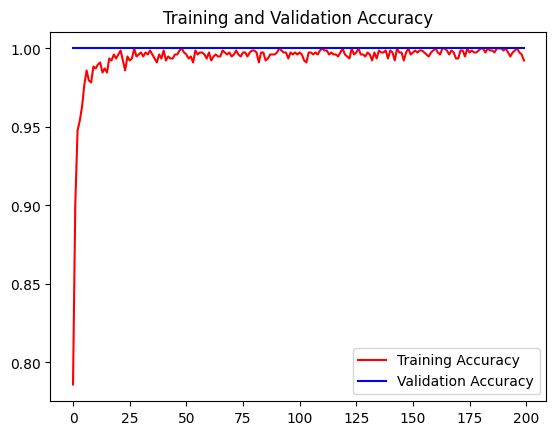

<Figure size 640x480 with 0 Axes>

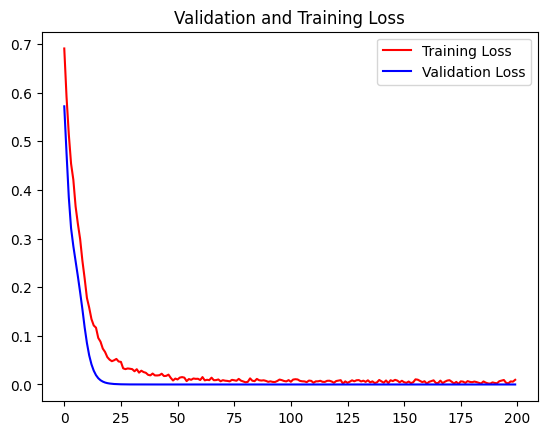

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 2.3622015128358525e-16
Test accuracy: 1.0


## Test Prediction

In [ ]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
620,0.000002,0.000004,0.000002,0.000004,0.000002,0.000004,0.000002,0.000004,0.000002,0.000004,...,0.000002,0.000006,0.000001,0.000005,0.000002,0.000006,0.000001,0.000006,0.000002,0.000006


In [ ]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [ ]:
df_data['class'].unique()

array(['Jumping_Jacks', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [ ]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [ ]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
Jumping_Jacks


## Export Model

In [ ]:
# Download this file for backup
model.save("model.h5")

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-06-10 08:22:17.316367: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749543737.343606   15503 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749543737.351776   15503 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [ ]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 8%)


Don't forget to download tfjs model (check relatable folder)